In [2]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

DATA_PATH = "data/"
train = pd.read_csv(f"{DATA_PATH}loan_default_train.csv")
test = pd.read_csv(f"{DATA_PATH}loan_default_test.csv")
train.shape, test.shape

((19548, 10), (13033, 9))

In [4]:
train.head()

,ID,나이,연간소득,주택소유상태,근로기간,대출목적,대출금액,이자율,신용거래기간,target
0,train_0,39,170000,임대,9.0,부채통합,17000,12.99,14,0
1,train_1,22,60000,모기지론,6.0,교육,2800,10.99,4,0
2,train_2,23,48152,모기지론,7.0,의료,9500,7.29,2,0
3,train_3,25,62496,모기지론,1.0,주택개선,8000,7.51,2,0
4,train_4,22,41500,임대,6.0,개인사업,2500,15.62,2,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19548 entries, 0 to 19547
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      19548 non-null  object 
 1   나이      19548 non-null  int64  
 2   연간소득    19548 non-null  int64  
 3   주택소유상태  19548 non-null  object 
 4   근로기간    18996 non-null  float64
 5   대출목적    19548 non-null  object 
 6   대출금액    19548 non-null  int64  
 7   이자율     17665 non-null  float64
 8   신용거래기간  19548 non-null  int64  
 9   target  19548 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.5+ MB


# 특성으로 사용할 변수 선정

In [6]:
train_ft = train.iloc[:, 1:-1].copy()
test_ft = test.iloc[:, 1:].copy()
train_ft.shape, test_ft.shape

((19548, 8), (13033, 8))

# 결측치 처리

In [7]:
train_ft.isnull().sum()

,0
나이,0
연간소득,0
주택소유상태,0
근로기간,552
대출목적,0
대출금액,0
이자율,1883
신용거래기간,0


In [8]:
test_ft.isnull().sum()

,0
나이,0
연간소득,0
주택소유상태,0
근로기간,343
대출목적,0
대출금액,0
이자율,1233
신용거래기간,0


In [9]:
a, b = train_ft["근로기간"].mean(), train_ft["이자율"].mean()

In [10]:
train_ft["근로기간"] = train_ft["근로기간"].fillna(a)
train_ft["이자율"] = train_ft["이자율"].fillna(b)

test_ft["근로기간"] = test_ft["근로기간"].fillna(a)
test_ft["이자율"] = test_ft["이자율"].fillna(b)

In [11]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

In [12]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# 피처 인코딩
- 범주형 데이터가 있을 경우

In [13]:
cols = ["주택소유상태", "대출목적"]
enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(train_ft[cols])

OneHotEncoder(handle_unknown='ignore')

In [14]:
train_ft[enc.get_feature_names_out()] = enc.transform(train_ft[cols]).toarray()
test_ft[enc.get_feature_names_out()] = enc.transform(test_ft[cols]).toarray()

In [15]:
train_ft.shape, test_ft.shape

((19548, 18), (13033, 18))

In [16]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

# 피처 스케일링

In [17]:
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [18]:
train_ft[train_ft.columns] = scaler.transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

# 정답 데이터 별도 변수에 담기

In [19]:
target = train["target"]

# 앙상블 학습(Ensemble Learning)
- 기계학습에서 여러개의 개별모델의 예측을 결합함으로써 보다 정확한 예측을 도출하는 기법
- 모델별로 편향성은 존재할 수 밖에 없다
    - 앙상블을 통해 보완함으로써 성능 향상
- 앙상블 학습의 유형
    - 보팅(Voting), 스태킹(Stacking), 배깅(Bagging), 부스팅(Boosting)

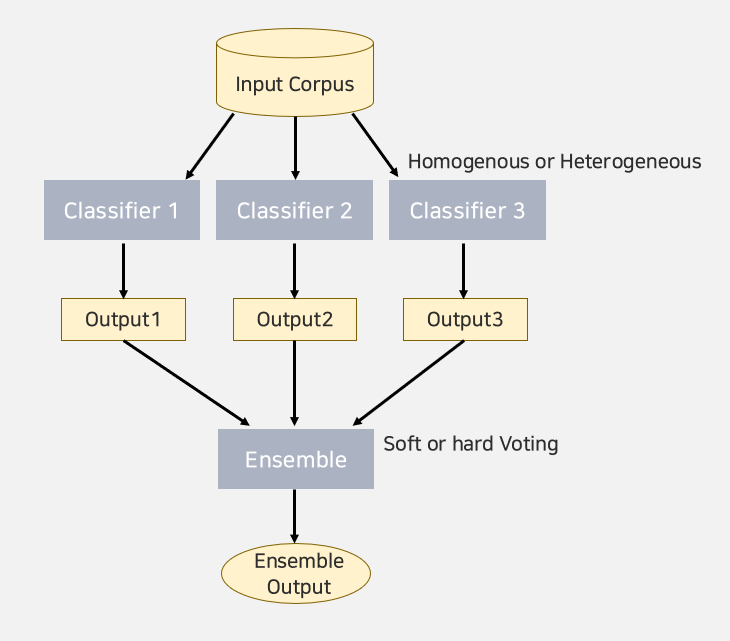

# 앙상블 효과
- 오버피팅 감소 효과로 인해 예측 성능 향상
- 개별 모델로 성능을 낼 수 없을 때 앙상블 기법을 사용하면 예측 성능 향상
    - 개별적으로 어느 정도 좋은 성능을 가지는 모델들을 앙상블 하는 것이 이상적
    - 동일한 모델들을 앙상블 하는 것은 효과가 없음




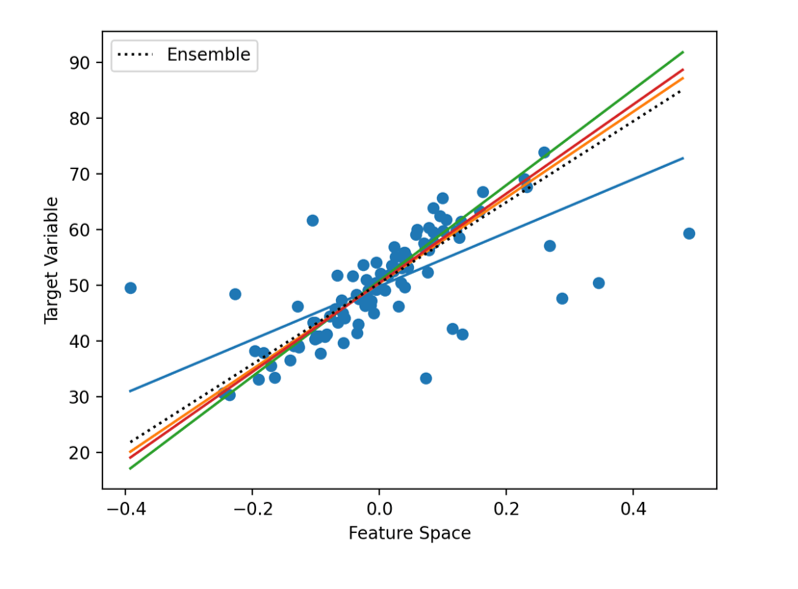

# Voting
- 여러 모델들의 예측값을 투표방식(hard) or 평균방식(soft) 으로 앙상블
- 분류, 회귀 모두 사용가능
- 하드 보팅(Hard Voting)
    - 예측 결과의 최빈값
    - 예측 결과를 투표하는 방식
    - 분류만 가능
- 소프트 보팅(Soft Voting)
    - 각 클래스의 예측 확률을 평균 내는 방식




    

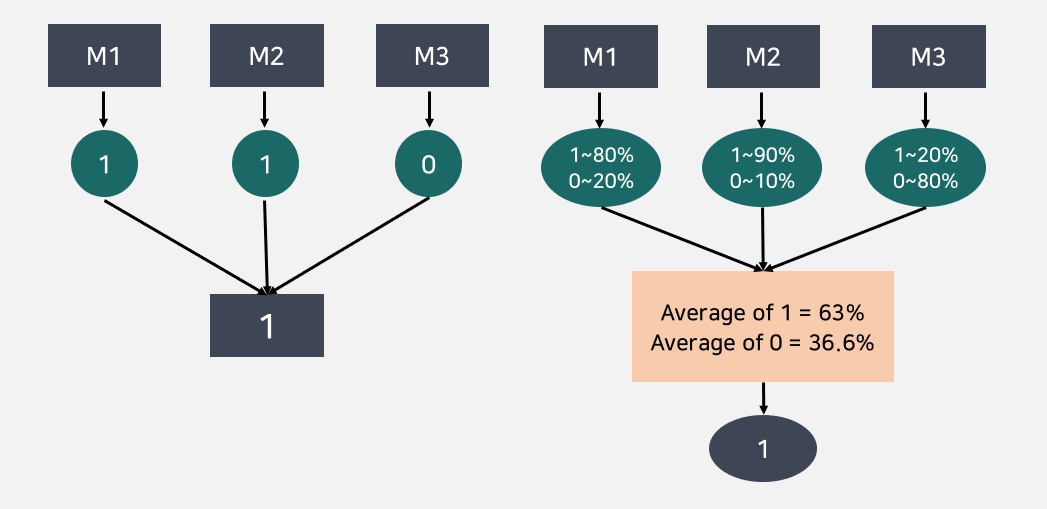

## VotingClassifier 주요 파라미터
- estimators
    - 모델의 별칭과 모델 객체가 담긴 튜플을 리스트에 담아 전달하면 된다.
- voting
    - 'hard'(default) , 'soft'

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(5, shuffle=True, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [22]:
estimators = [
    ("dt", DecisionTreeClassifier(random_state=42)),
    ("lr", LogisticRegression(random_state=42)),
    ("knn", KNeighborsClassifier()),
]

In [23]:
params = {
    "estimators": estimators,
    "voting": "soft",
    "n_jobs": -1
}

model = VotingClassifier(**params)

In [24]:
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1", n_jobs=-1) # 채무불이행(1) 을 맞추는게 중요하므로 f1 사용
scores.mean()

0.6407443016990851

In [25]:
model.fit(train_ft, target)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 n_jobs=-1, voting='soft')

In [26]:
model.predict(test_ft)

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
# model.predict_proba(test_ft) # hard 방식에서는 predict_proba 사용불가

# Stacking
- 여러 모델들의 예측 결과를 학습 데이터로 만들어서 다시 별도의 최종 모델(메타 모델)로 재학습시켜 예측하는 방식​
- Stacking Ensemble은 학습된 모델들의 예측 결과를 Features로 사용하여 메타 모델이 다시 학습시키는 방식
- 과적합 방지를 위해 내부적으로 각모델별로 CV 를 진행한다.
- 분류, 회귀 모두 사용가능


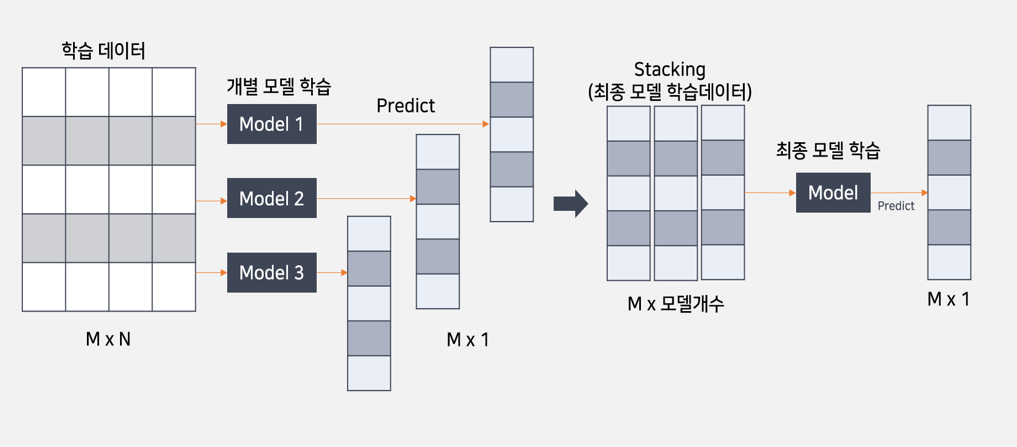

## 교차 검증 기반의 스태킹 과정
- Stacking Ensemble의 학습데이터에 과적합 되는 문제 개선
- 개별 모델들의 교차 검증을 통해 나온 검증 세트의 예측 값을 최종 모델에서 학습데이터로 사용
    1. 개별 모델 학습 단계에서 학습 데이터를 K-Fold로 분리
    2. 한 개의 Fold를 검증 세트로 함
    3. 검증 세트의 예측값을 최종 모델의 학습 데이터로 함(K번 반복)





### 한 개의 개별 모델 3-Fold 학습 예시

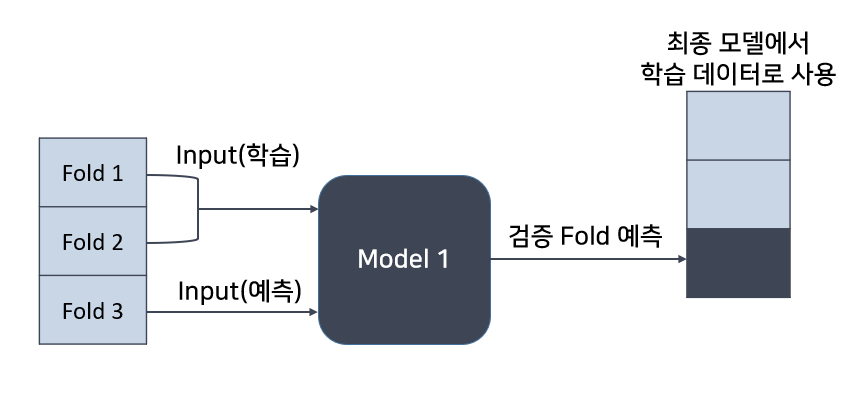

- 개별 모델들은 예측 단계에서 테스트 데이터에 대하여 예측 시에는 Fold 별 모델의 테스트데이터에 대한 예측값들을 평균

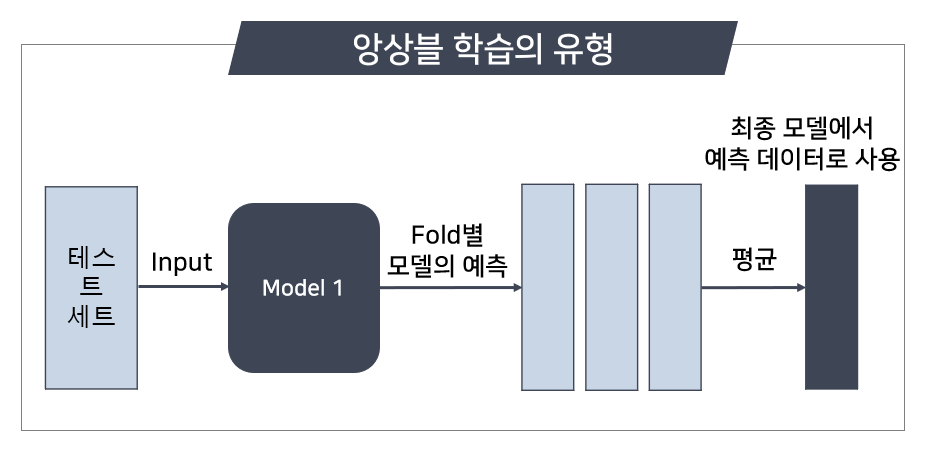

## StackingClassifier 주요 파라미터
- estimators
    - 모델 객체를 리스트에 담아 전달
- final_estimator
    - 메타 모델 객체 전달
- cv
    - 정수(fold 수) 혹은 cv 객체 전달

In [28]:
estimators

[('dt', DecisionTreeClassifier(random_state=42)),
 ('lr', LogisticRegression(random_state=42)),
 ('knn', KNeighborsClassifier())]

In [29]:
from sklearn.ensemble import StackingClassifier

params = {
    "estimators": estimators,
    "final_estimator": LogisticRegression(random_state=42),
    "cv": cv,
    "n_jobs": -1
}

model = StackingClassifier(**params)

scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1", n_jobs=-1)
scores.mean()

0.68112203802233

In [30]:
model.fit(train_ft, target)
model.predict(test_ft)

array([0, 0, 0, ..., 0, 0, 0])

# Bagging
- Bootstrap aggregating의 약자로 Bootstrap sampling 기법을 이용해 학습데이터를 여러 번 뽑아 각 모델에 학습시켜 예측 결과의 최빈값 또는 평균으로 예측하는 방식
- Bootstrap sampling
    - 크기가 n인 학습데이터가 주어졌을 때 하나의 샘플이 나올 확률은 1/n 으로 하고 랜덤하게 샘플들을 뽑아 새로운 학습데이터를 여러 개 만드는 기법으로 한 번 뽑힌 샘플을 복원하여 다시 뽑는 복원 추출법이 사용
    
- 분류, 회귀 모두 사용가능


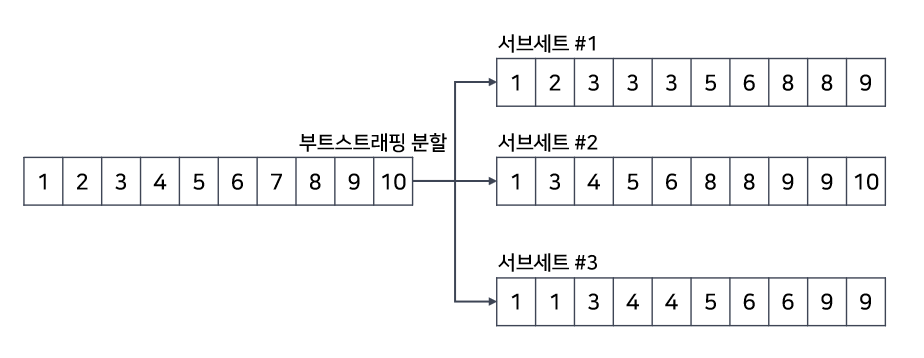

## BaggingClassifier 주요 파라미터
- random_state
    - 시드값
- estimator
    - 모델 객체를 전달하면 된다.
    - 기본값은 None이며 tree 모델이 선택된다.
- n_estimators
    - base 모델 개수
    - 기본값은 10
- max_samples
    - 각 모델이 학습시 사용할 샘플 개수
    - int(개수) or float(비율) 형으로 주면 된다. 기본값 1.0
- max_features
    - 각 모델이 학습시 사용할 피쳐 개수
    - int(개수) or float(비율) 형으로 주면 된다. 기본값 1.0
- bootstrap_features
    - 각 모델별로 피쳐를 다르게 할지 여부
    - bool 자료형을 넣으면 되고 기본값은 False

In [31]:
from sklearn.ensemble import BaggingClassifier

params = {
    "random_state": 42,
    # "estimator": LogisticRegression(random_state=42),
    "n_estimators": 100,
    "n_jobs": -1
}

model = BaggingClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1", n_jobs=-1)
scores.mean()

0.770575727742455

In [32]:
model.fit(train_ft, target)
model.predict(test_ft)

array([0, 0, 0, ..., 0, 0, 0])

# Random Forest
- 다수의 결정 트리 모델이 학습데이터에서 **배깅 방식**으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 앙상블 하는 모델
- 각 결정 트리 모델의 예측 결과의 상관 관계를 줄이고 다양성을 주기위해 전체 특성을 사용하지 않고 각 트리별로 랜덤하게 m개의 특성을 선택하여 학습
- 분류, 회귀 모두 사용가능


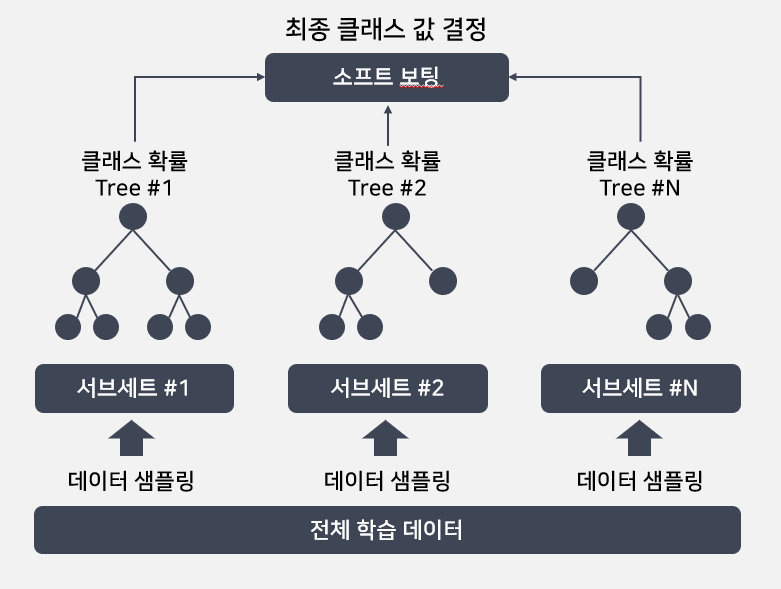

## RandomForestClassifier 주요 파라미터
- random_state
    - 시드값
- n_estimators
    - tree 모델 개수
    - 기본값은 100
- max_samples
    - 각 트리모델이 학습시 사용할 샘플 개수
    - int(개수) or float(비율) 형으로 주면 된다. 기본값 None
- 트리모델에 있는 하이퍼파라미터를 그대로 사용가능하다.
    - min_samples_split , max_depth , max_features, max_leaf_nodes

In [33]:
from sklearn.ensemble import RandomForestClassifier

params = {
    "random_state": 42,
    "n_estimators": 200,
    "n_jobs": -1,
    "max_features": None
}

model = RandomForestClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1", n_jobs=-1)
scores.mean()

0.7721333109246438

In [34]:
model.fit(train_ft, target)
model.predict(test_ft)

array([0, 0, 0, ..., 0, 0, 0])

- 피처 중요도 보기

In [35]:
model.feature_importances_

array([0.05152093, 0.28126096, 0.06379164, 0.17866238, 0.21202361,
       0.03598473, 0.00132389, 0.00416718, 0.00801025, 0.07139571,
       0.00745911, 0.00759502, 0.02622624, 0.02828156, 0.01664603,
       0.00565075])

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

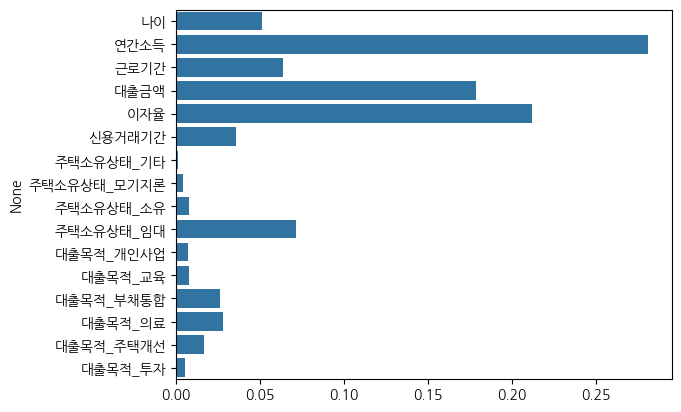

In [37]:
sns.barplot(x=model.feature_importances_, y=train_ft.columns)
plt.show()

In [38]:
# 전달 받은 배열의 값들을 오름차순으로 정렬했을 때 대응되는 인덱스 번호 반환
sort_idx = np.argsort(model.feature_importances_)[::-1]
sort_idx

array([ 1,  4,  3,  9,  2,  0,  5, 13, 12, 14,  8, 11, 10, 15,  7,  6])

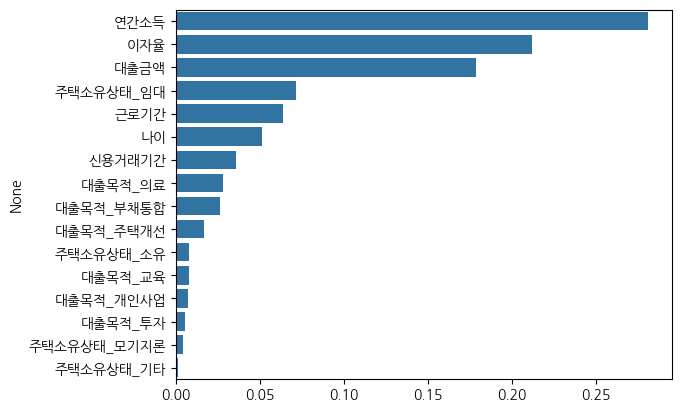

In [39]:
sns.barplot(x=model.feature_importances_[sort_idx], y=train_ft.columns[sort_idx])
plt.show()

In [40]:
model.feature_importances_

array([0.05152093, 0.28126096, 0.06379164, 0.17866238, 0.21202361,
       0.03598473, 0.00132389, 0.00416718, 0.00801025, 0.07139571,
       0.00745911, 0.00759502, 0.02622624, 0.02828156, 0.01664603,
       0.00565075])

In [41]:
import graphviz
from sklearn.tree import export_graphviz

In [42]:
len(model.estimators_)

200

In [43]:
# params = {
#     "decision_tree": model.estimators_[0],
#     "feature_names": train_ft.columns,
# }

# dot_data = export_graphviz(**params)
# graphviz.Source(dot_data)

# Gradient Boosting
- 트리 기반의 Boosting 계열의 앙상블 모델
- 부스팅(Boosting)
    - 여러 개의 약한 학습기를 순차적으로 학습하면서 약한 학습기들을 결합하여 강한 분류기를 만드는 과정
    - 배깅과 다른 점은 순차적으로 학습기를 생성
- Gradient boosting 외의 Boosting 계열의 알고리즘으로 Adaptive boosting이 있음
- 정형 데이터에 대한 예측에서 엄청난 성능을 보여주고 머신러닝 알고리즘 중에서도 가장 예측 성능이 높다고 알려진 알고리즘
- Gradient Boosting 알고리즘을 기반으로 XGBoost, LightGBM, CatBoost 등과 같은 개선된 모델이 있음
- 분류, 회귀 모두 사용가능
- 데이터가 적으면 과적합이 발생한다.


## Gradient Boosting 학습 원리
- 이전 학습기에서 발생한 잔여 오차(Residual Error)를 y값으로 하여 새로운 학습기로 학습을 시키는 방식
- 순차적으로 반복하다 보면 잔여 오차는 0에 가까워 짐
- 최종적으로 모든 학습기를 결합하여 예측





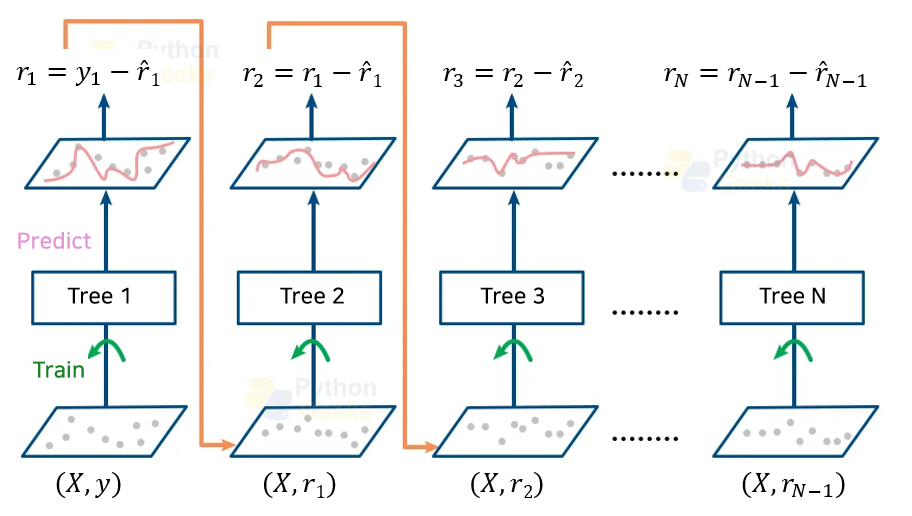

## GradientBoostingClassifier 주요 파라미터
- random_state
    - 시드값
- n_estimators
    - 부스팅 단계수
    - 기본값은 100
- learning_rate
    - 각 학습기(weak learner)가 전체 모델에 얼마나 큰 영향을 미치는지를 조절하는 하이퍼파라미터
    - 기본값은 0.1로 0~1 사이의 값을 전달
    - 1에 가까운 값을 전달할수록 오버피팅 가능성 증가
- 트리모델에 있는 하이퍼파라미터를 그대로 사용가능하다.
    - min_samples_split , max_depth , min_samples_split , max_features, max_leaf_nodes

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    "random_state": 42,
    "n_estimators": 150,
    "learning_rate": 0.2,
}

model = GradientBoostingClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1", n_jobs=-1)
scores.mean()

0.7690470245158383

In [45]:
model.fit(train_ft, target)
model.predict(test_ft)

array([0, 0, 0, ..., 0, 0, 0])

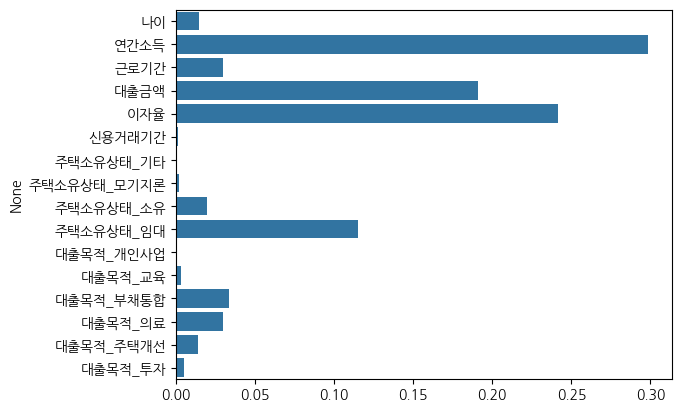

In [46]:
sns.barplot(x=model.feature_importances_, y=train_ft.columns)
plt.show()

In [47]:
# params = {
#     "decision_tree": model.estimators_[0][0],
#     "feature_names": train_ft.columns,
# }

# dot_data = export_graphviz(**params)
# graphviz.Source(dot_data)

## XGBoost(eXtreme Gradient Boosting)
- Gradient Boosting 모델의 성능을 향상시키기 위해 여러 가지 최적화와 개선을 적용한 버전
- GBM의 느린 수행시간을 개선하고 과적합 규제 등 다양한 기능이 지원되는 GBM 기반 라이브러리
- 머신러닝 과제에서 뛰어난 예측 성능을 보임
- tree 기반의 앙상블 학습에서 각광받는 알고리즘
- 분류, 회귀 모두 사용가능
- XGBoost는 사이킷런과 연동되는 모듈을 지원한다.
- https://xgboost.readthedocs.io/en/stable/
- 설치 방법
    ```bash
    pip install xgboost
    ```


### XGBClassifier 주요 파라미터
- random_state
    - 시드값
- objective
    - 목적함수
    - 기본값 'binary:logistic'
    - 다중분류일 경우 'multi:softmax'
    - 생략가능
- n_estimators
    - 부스팅 단계수, 기본값은 100
- learning_rate
    - 학습률, 기본값은 0.1
- max_depth
    - 각 트리의 최대 깊이, 기본값은 6
- subsample
    - 각 트리에서 사용할 데이터 샘플의 비율, 기본값은 1
- colsample_bytree
    - 각 트리를 만들 때 사용할 피처의 비율, 기본값은 1
- colsample_bynode
    - 각 노드를 분할할 때 사용할 피처의 비율, 기본값은 1
- 그 외 다양한 파라미터가 있다. 다음 문서를 참고
    - https://xgboost.readthedocs.io/en/stable/parameter.html

In [48]:
from xgboost import XGBClassifier

params = {
    "random_state": 42,
    "n_estimators": 200,
    "learning_rate": 0.2,
    "n_jobs": -1,
}

model = XGBClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1", n_jobs=-1)
scores.mean()

0.7809862117436976

In [49]:
model.fit(train_ft, target)
model.predict(test_ft)

array([0, 0, 0, ..., 0, 0, 0])

### 학습 제어 관련 주요 파라미터
- early_stopping_rounds
    - 조기 종료 횟수
    - ex) 50을 전달할 경우 검증셋에 대한 평가 과정에서 50번 연속으로 개선이 없을 경우 부스팅 중단
- eval_metric
    - 검증셋에 대한 평가지표
- fit 메서드의 eval_set 파라미터
    - 검증 데이터 전달
    - 검증셋(x, y)이 담긴 튜플을 리스트로 전달

In [50]:
from sklearn.metrics import f1_score

In [51]:
def f1_eval_metric(true, pred):
    pred = (pred >= 0.5).astype(int)
    return 1 - f1_score(true, pred)

In [52]:
params = {
    "random_state": 42,
    "n_estimators": 200,
    "learning_rate": 0.2,
    "n_jobs": -1,
    "early_stopping_rounds": 50,
    "eval_metric": f1_eval_metric
}

scores = []
models = []
for tri, vai in cv.split(train_ft, target):
    # 학습데이터
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]

    # 검증데이터
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    model = XGBClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)])

    models.append(model)

    pred = model.predict(x_valid)
    score = f1_score(y_valid, pred)
    scores.append(score)

[0]	validation_0-logloss:0.45120	validation_0-f1_eval_metric:1.00000
[1]	validation_0-logloss:0.40399	validation_0-f1_eval_metric:0.53626
[2]	validation_0-logloss:0.37187	validation_0-f1_eval_metric:0.36850
[3]	validation_0-logloss:0.35051	validation_0-f1_eval_metric:0.31689
[4]	validation_0-logloss:0.33330	validation_0-f1_eval_metric:0.29602
[5]	validation_0-logloss:0.31892	validation_0-f1_eval_metric:0.28023
[6]	validation_0-logloss:0.30876	validation_0-f1_eval_metric:0.27678
[7]	validation_0-logloss:0.29930	validation_0-f1_eval_metric:0.26487
[8]	validation_0-logloss:0.29220	validation_0-f1_eval_metric:0.26249
[9]	validation_0-logloss:0.28623	validation_0-f1_eval_metric:0.25895
[10]	validation_0-logloss:0.27964	validation_0-f1_eval_metric:0.25575
[11]	validation_0-logloss:0.27609	validation_0-f1_eval_metric:0.25858
[12]	validation_0-logloss:0.27366	validation_0-f1_eval_metric:0.25523
[13]	validation_0-logloss:0.26933	validation_0-f1_eval_metric:0.24896
[14]	validation_0-logloss:0.26

In [53]:
np.mean(scores)

0.7853022800734559

In [54]:
pred_list = []
for model in models:
    pred = model.predict_proba(test_ft)[:,1]
    pred_list.append(pred)

In [55]:
pred = np.mean(pred_list, axis=0)
pred.shape

(13033,)

In [56]:
(pred >= 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

- 피처중요도

In [57]:
params = {
    "random_state": 42,
    "n_estimators": 200,
    "learning_rate": 0.2,
    "n_jobs": -1,
}

model = XGBClassifier(**params)
model.fit(train_ft, target)
model.predict(test_ft)

array([0, 0, 0, ..., 0, 0, 0])

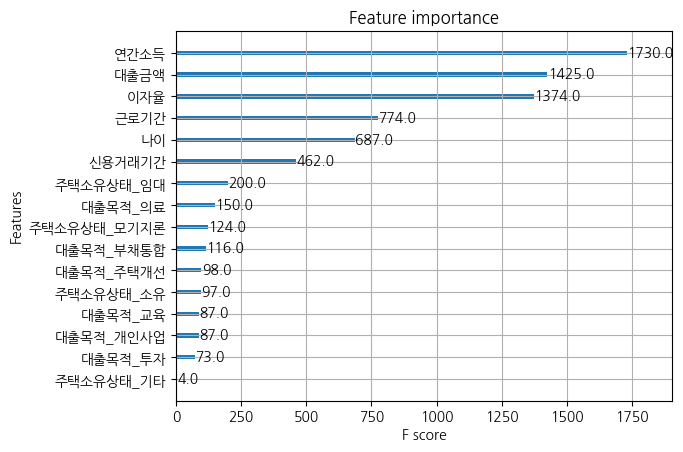

In [58]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

- 트리 시각화

In [59]:
# from xgboost import to_graphviz
# to_graphviz(model, num_trees=1)

## LightGBM
- Microsoft에서 개발한 Gradient Boosting 계열의 라이브러리
- 대용량 데이터 처리에 적합하며 XGBoost와 마찬가지로 병렬처리 및 GPU를 지원
- 다른 GBM 계열의 알고리즘보다 메모리를 적게 사용하고 학습속도가 빠름
- XGBoost와 유사한 성능을 제공하면서도 더 빠른 학습 속도와 낮은 메모리 사용량을 자랑
- 하지만 데이터 수가 너무 적을 때는 과적합 문제를 일으키기도 한다.
- XGBoost 보다 학습에 걸리는 시간이 적음
- 일반적인 트리 계열 알고리즘과 다르게 LightGBM은 리프 중심 트리 분할을 사용
   

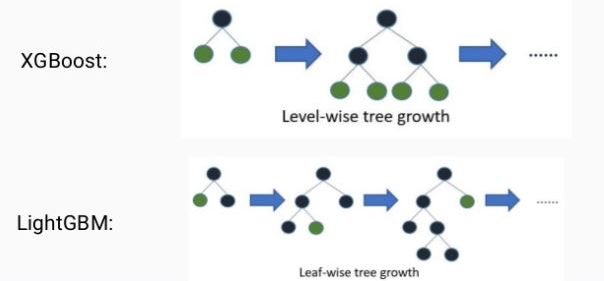

- 분류, 회귀 모두 사용가능
- https://lightgbm.readthedocs.io/en/latest/index.html
- 설치 방법
    ```bash
    pip install lightgbm
    ```


### 주요 파라미터
- random_state
    - 시드값
- objective
    - 목적함수
    - 기본값 'binary'
    - 다중분류는 'multiclass'
- n_estimators
    - 부스팅 단계수, 기본값은 100
- learning_rate
    - 학습률, 기본값은 0.1
- max_depth
    - 각 트리의 최대 깊이, 기본값은 -1
- min_child_samples
    - 리프 노드에 포함될 최소 샘플 수, 기본값은 20
- subsample
    - 각 트리에서 사용할 데이터 샘플의 비율, 기본값은 1
- colsample_bytree
    - 각 트리를 만들 때 사용할 피처의 비율, 기본값은 1
- colsample_bynode"
    - 각 노드를 분할할 때 사용할 피처의 비율, 기본값은 1
- 그 외 다양한 파라미터가 있다. 다음 문서를 참고
    - https://lightgbm.readthedocs.io/en/latest/Parameters.html


In [60]:
from lightgbm import LGBMClassifier

params = {
    'random_state': 42,
    'n_estimators': 200,
    'learning_rate': 0.2,
    'n_jobs': -1
}

model = LGBMClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring='f1', n_jobs=-1)
scores.mean()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


0.7806263246427385

In [61]:
model.fit(train_ft, target)
model.predict(test_ft)

[LightGBM] [Info] Number of positive: 4265, number of negative: 15283
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218181 -> initscore=-1.276299
[LightGBM] [Info] Start training from score -1.276299


array([0, 0, 0, ..., 0, 0, 0])

### 학습 제어 관련 주요 파라미터
- early_stopping_round
    - 조기 종료 횟수
    - ex) 50을 전달할 경우 검증셋에 대한 평가 과정에서 50번 연속으로 개선이 없을 경우 부스팅 중단
- metric
    - 검증셋에 대한 평가지표
    - 문자열만 전달 가능
    - https://lightgbm.readthedocs.io/en/latest/Parameters.html#metric-parameters
- fit 메서드의 eval_metric 파라미터
    - 부스팅 단계별로 검증셋에 대한 평가를 위한 콜백 함수를 전달
- fit 메서드의 eval_set 파라미터
    - 검증 데이터 전달
    - 검증셋(x, y)이 담긴 튜플을 리스트로 전달

In [62]:
def f1_lgbm_metric(true, pred):
    pred = (pred > 0.5).astype(int)
    return "f1_score", f1_score(true, pred), True

In [63]:
params = {
    "random_state": 42,
    "n_estimators": 1000,
    "learning_rate": 0.2,
    "n_jobs": -1,
    "early_stopping_round": 50,
    # "metric": "auc"
}

scores = []
models = []
for tri, vai in cv.split(train_ft, target):
    # 학습데이터
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]

    # 검증데이터
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    model = LGBMClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric=f1_lgbm_metric)

    models.append(model)

    pred = model.predict(x_valid)
    score = f1_score(y_valid, pred)
    scores.append(score)

[LightGBM] [Info] Number of positive: 3412, number of negative: 12226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 15638, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218186 -> initscore=-1.276266
[LightGBM] [Info] Start training from score -1.276266
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid_0's binary_logloss: 0.234965	valid_0's f1_score: 0.782784
[LightGBM] [Info] Number of positive: 3412, number of negative: 12226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 15638, number of use

In [64]:
np.mean(scores)

0.77868798917817

## catboost
- XGBoost, LightGBM과 함께 머신러닝 태스크에서 가장 많이 사용되는 라이브러리 중 하나
- 범주형 변수에 강력한 성능을 보여주는 부스팅 모델
- 범주형 변수가 많을경우 높은 성능과 함께 학습 속도가  개선된다.
- 수치형 변수가 대부분일 때는 매우 느리다.
- 범주형 변수를 인코딩 하지 않고 넣어도 된다.
    - 내부적으로 배깅과 유사한 방식의 Target Encoding, One-hot Encoding 방식으로 범주형 변수를 인코딩
    - Target Encoding 은 해당 범주를 타겟값의 평균으로 인코딩하는 방법으로 타겟을 피쳐로 사용하게 되는 과적합 문제가 있음
    - catboost는 자체적으로 배깅기법과 유사한 방식으로 부분적으로 데이터를 샘플링해서 타겟 인코딩을 수행함

- Target Encoding 예시

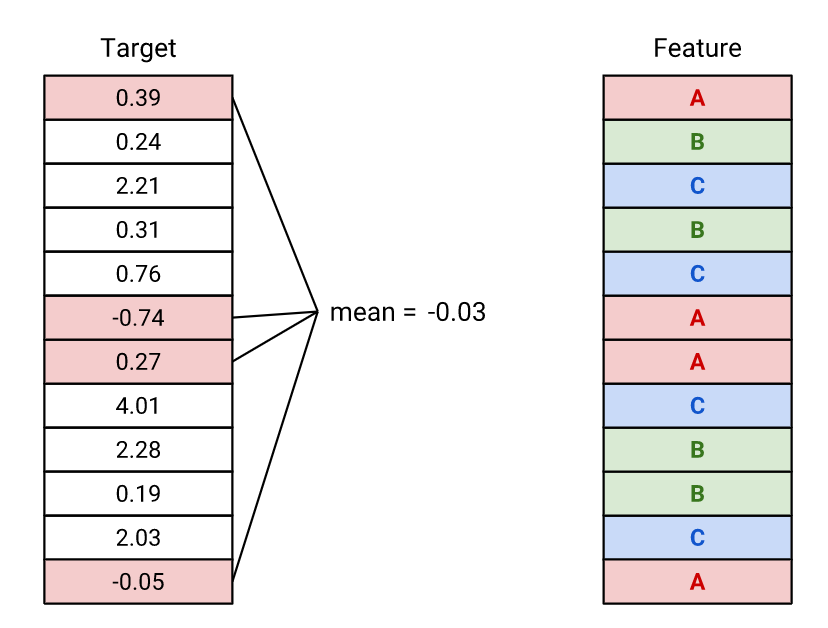

- https://catboost.ai/en/docs/
- 설치 방법
    ```bash
    pip install catboost
    ```


### CatBoostClassifier 주요 파라미터
- random_state
    - 시드값
- iterations
    - 부스팅 단계수, 기본값은 100
- loss_function
    - 손실함수 정의
    - https://catboost.ai/en/docs/concepts/loss-functions

- cat_features
    - 범주형 컬럼들을 리스트에 담아 넣는다.
- one_hot_max_size
    - 범주형 변수의 고유값이 이 파라미터수 이하이면 원핫 인코딩을 한다.



In [65]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [66]:
from catboost import CatBoostClassifier

In [67]:
params = {
    "random_state": 42,
    "iterations": 200,
}

model = CatBoostClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1", n_jobs=-1)
scores.mean()

0.7775820127863473

In [68]:
model.fit(train_ft, target)
model.predict(test_ft)

Learning rate set to 0.160395
0:	learn: 0.5805308	total: 81.5ms	remaining: 16.2s
1:	learn: 0.5108383	total: 108ms	remaining: 10.7s
2:	learn: 0.4598778	total: 120ms	remaining: 7.89s
3:	learn: 0.4268740	total: 136ms	remaining: 6.68s
4:	learn: 0.3996522	total: 145ms	remaining: 5.64s
5:	learn: 0.3789653	total: 186ms	remaining: 6.02s
6:	learn: 0.3670189	total: 211ms	remaining: 5.82s
7:	learn: 0.3542933	total: 223ms	remaining: 5.36s
8:	learn: 0.3435327	total: 232ms	remaining: 4.92s
9:	learn: 0.3373935	total: 277ms	remaining: 5.27s
10:	learn: 0.3303095	total: 292ms	remaining: 5.01s
11:	learn: 0.3263114	total: 300ms	remaining: 4.7s
12:	learn: 0.3215243	total: 315ms	remaining: 4.53s
13:	learn: 0.3177441	total: 337ms	remaining: 4.47s
14:	learn: 0.3140384	total: 348ms	remaining: 4.29s
15:	learn: 0.3102529	total: 355ms	remaining: 4.08s
16:	learn: 0.3061113	total: 361ms	remaining: 3.89s
17:	learn: 0.3016107	total: 369ms	remaining: 3.73s
18:	learn: 0.2999707	total: 376ms	remaining: 3.58s
19:	learn: 

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
model.feature_importances_

array([ 3.40754008, 28.80881861,  3.59536916, 19.48170693, 16.24075129,
        0.81537985,  0.07496292,  0.9272182 ,  7.36713342,  8.58157477,
        0.40461837,  0.48887295,  2.39864627,  1.8819083 ,  4.03695443,
        1.48854444])

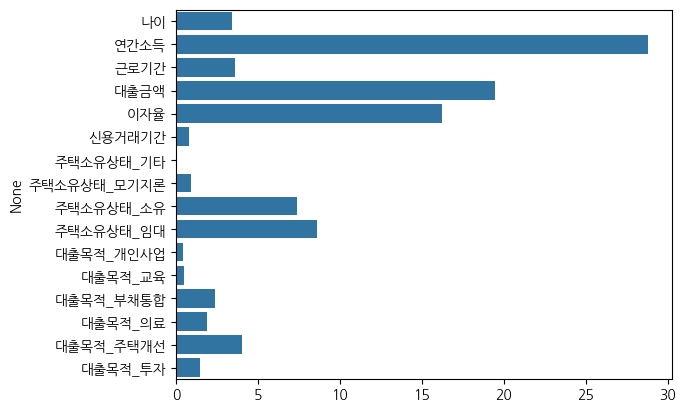

In [70]:
sns.barplot(x=model.feature_importances_, y=train_ft.columns)
plt.show()

In [71]:
# model.plot_tree(0)

### 학습 제어 관련 주요 파라미터
- early_stopping_rounds
    - 조기 종료 횟수
    - ex) 50을 전달할 경우 검증셋에 대한 평가 과정에서 50번 연속으로 개선이 없을 경우 부스팅 중단
- eval_metric
    - 검증셋에 대한 평가지표
    - https://catboost.ai/en/docs/concepts/loss-functions
- fit 메서드의 eval_set 파라미터
    - 검증 데이터 전달
    - 검증셋(x, y)이 담긴 튜플을 리스트로 전달

In [72]:
params = {
    "random_state": 42,
    "iterations": 1000,
    "early_stopping_rounds": 50,
    "eval_metric": "F1"
}

scores = []
models = []
for tri, vai in cv.split(train_ft, target):
    # 학습데이터
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]

    # 검증데이터
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    model = CatBoostClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)])

    models.append(model)

    pred = model.predict(x_valid)
    score = f1_score(y_valid, pred)
    scores.append(score)

Learning rate set to 0.062499
0:	learn: 0.5520330	test: 0.5411596	best: 0.5411596 (0)	total: 8.9ms	remaining: 8.89s
1:	learn: 0.5085703	test: 0.5072698	best: 0.5411596 (0)	total: 17.5ms	remaining: 8.75s
2:	learn: 0.5714286	test: 0.5776772	best: 0.5776772 (2)	total: 27.9ms	remaining: 9.28s
3:	learn: 0.5801584	test: 0.5787106	best: 0.5787106 (3)	total: 37.5ms	remaining: 9.33s
4:	learn: 0.5721336	test: 0.5703480	best: 0.5787106 (3)	total: 52.8ms	remaining: 10.5s
5:	learn: 0.5908063	test: 0.5909091	best: 0.5909091 (5)	total: 87.6ms	remaining: 14.5s
6:	learn: 0.5936913	test: 0.5826415	best: 0.5909091 (5)	total: 126ms	remaining: 17.8s
7:	learn: 0.6061057	test: 0.6085011	best: 0.6085011 (7)	total: 141ms	remaining: 17.5s
8:	learn: 0.6024995	test: 0.6083707	best: 0.6085011 (7)	total: 162ms	remaining: 17.8s
9:	learn: 0.6031508	test: 0.6082397	best: 0.6085011 (7)	total: 174ms	remaining: 17.2s
10:	learn: 0.6344853	test: 0.6309611	best: 0.6309611 (10)	total: 195ms	remaining: 17.5s
11:	learn: 0.6428

In [73]:
np.mean(scores)

0.7793037542798757